In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


### Import會用到的套件

In [22]:
import keras

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.backend import set_session
import tensorflow as tf
import os
def create_session(gpu_id='0', pp_mem_frac=None):

    tf.reset_default_graph()
    os.environ["CUDA_VISIBLE_DEVICES"] = gpu_id # can multiple?
    with tf.device('/gpu:' + gpu_id):
        config = tf.ConfigProto()
        config.gpu_options.allow_growth = True
        if pp_mem_frac is not None:
            config.gpu_options.per_process_gpu_memory_fraction=pp_mem_frac
        session = tf.Session(config = config)
    return session

gpu_id = '0'
sess = create_session(gpu_id)
set_session(sess)

Using TensorFlow backend.


### 讀取mnist dataset

In [77]:
from keras.datasets import imdb

In [78]:
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

In [79]:
#x_train

In [80]:
print('x_train的樣子:',x_train.shape)
print('x_train的長度:',len(x_train))
print('x_test的長度:',len(x_test))

x_train的樣子: (25000,)
x_train的長度: 25000
x_test的長度: 25000


In [81]:
for i in range(10):
  print(len(x_train[i]), end = ',')

218,189,141,550,147,43,123,562,233,130,

In [82]:
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

### 資料前處理

In [83]:
from keras.preprocessing import sequence

In [84]:
max_words = 1000
x_train = sequence.pad_sequences(x_train, maxlen = max_words)
x_test = sequence.pad_sequences(x_test, maxlen = max_words)

In [85]:
print('x_train的樣子:',x_train.shape)

x_train的樣子: (25000, 1000)


### import RNN需要用到的套件

In [86]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM , Dropout

In [87]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_words))
#model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dense(1, activation = 'sigmoid'))

### 看看Model的summary

In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________


### 開始實驗

In [89]:
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [90]:
history = model.fit(x_train, y_train, batch_size = 64, epochs=3, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 493s 25ms/step - loss: 0.4683 - acc: 0.7792 - val_loss: 0.4960 - val_acc: 0.7624
Epoch 2/3
20000/20000 [==============================] - 492s 25ms/step - loss: 0.2747 - acc: 0.8924 - val_loss: 0.3036 - val_acc: 0.8772
Epoch 3/3
20000/20000 [==============================] - 492s 25ms/step - loss: 0.2001 - acc: 0.9251 - val_loss: 0.3568 - val_acc: 0.8574


In [91]:
score = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 398s 16ms/step


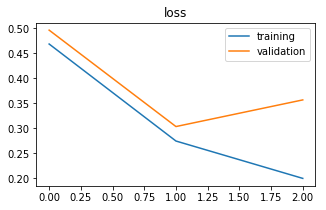

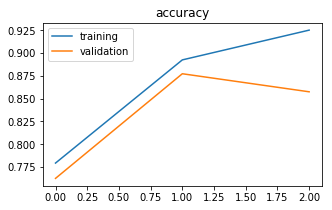

In [92]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'], label='training')
plt.plot(history.epoch,history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend(loc='best')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'], label='training')
plt.plot(history.epoch,history.history['val_acc'], label='validation')
plt.title('accuracy')
plt.legend(loc='best');

In [93]:
print('測試資料的 LOSS : ', score[0])
print('測試資料的 Accuracy : ', score[1])

測試資料的 LOSS :  0.3621868206977844
測試資料的 Accuracy :  0.85452
